<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/opencv-projects-and-guide/ocr-works/07_docTR_text_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## docTR for text OCR

**Reference**

https://mindee.github.io/doctr/

https://github.com/mindee/doctr

##Setup

In [ ]:
# TensorFlow
# !pip install python-doctr[tf]
# PyTorch
!pip install python-doctr[torch]

Now go to  `Runtime/Restart runtime` for your changes to take effect!

We're going to review the main features of docTR 🎁
And for you to have a proper overview of its capabilities, we will need some free fonts for a proper output visualization:

In [ ]:
# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y

Let's take care of all the imports directly

In [2]:
%matplotlib inline
import os

import cv2

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

For the next steps, we will need a proper PDF document that will be used to showcase the library features

In [ ]:
# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True)

##Synodex Image OCR

In [6]:
image = cv2.imread("sample2.png")
print(image.shape)

# Cropping an image
cropped_image = image[100:2300, 50:1615]  # slicing image[rows, columns]
cv2.imwrite("sample_cropped.png", cropped_image)

(2339, 1653, 3)


True

In [7]:
# Read the file
doc = DocumentFile.from_images("sample_cropped.png")
print(f"Number of pages: {len(doc)}")

Number of pages: 1


In [8]:
result = predictor(doc)
json_output = result.export()
json_output

{'pages': [{'blocks': [{'artefacts': [],
     'geometry': ((0.0078125, 0.064453125), (0.1474609375, 0.111328125)),
     'lines': [{'geometry': ((0.015625, 0.064453125),
        (0.1376953125, 0.0859375)),
       'words': [{'confidence': 0.9990807771682739,
         'geometry': ((0.015625, 0.064453125), (0.1376953125, 0.0859375)),
         'value': 'MAYO'}]},
      {'geometry': ((0.0078125, 0.08984375), (0.1474609375, 0.111328125)),
       'words': [{'confidence': 0.9977974891662598,
         'geometry': ((0.0078125, 0.08984375), (0.1474609375, 0.111328125)),
         'value': 'CLINIC'}]}]},
    {'artefacts': [],
     'geometry': ((0.5908203125, 0.0703125), (0.7568359375, 0.0859375)),
     'lines': [{'geometry': ((0.5908203125, 0.0703125),
        (0.7568359375, 0.0859375)),
       'words': [{'confidence': 0.9998435974121094,
         'geometry': ((0.5908203125, 0.0703125), (0.6298828125, 0.0849609375)),
         'value': 'Visit'},
        {'confidence': 0.9997246861457825,
         'ge

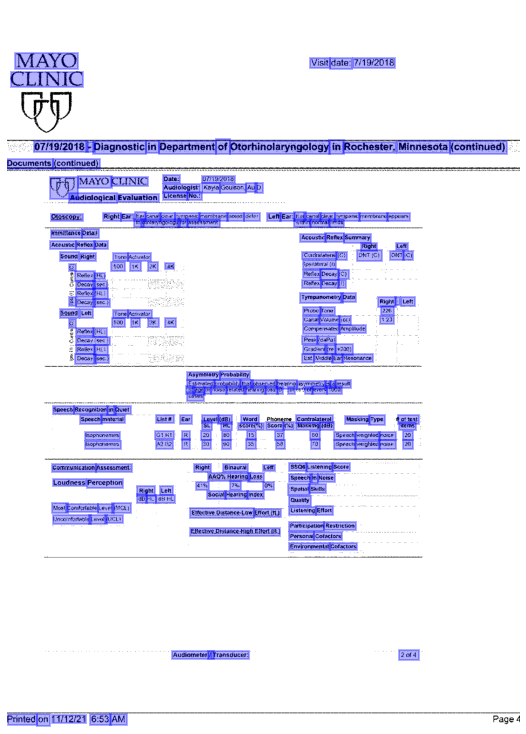

In [9]:
result.show(doc)